# Feature Engineering and Model Selection for Classification Task

In [99]:
#import libraries
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, Adadelta
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

%matplotlib inline

In [100]:
plt.rcParams['figure.figsize'] = [10, 8]
matplotlib.use('Qt4Agg')

/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


In [3]:
#import data
data = pd.read_csv("./sample.csv")

In [4]:
data.head()

,0,0.1,0.2,20000,0.3,0.4,1,0.5,0.6,0.7,...,0.272,0.273,0.274,0.275,0.276,1.10,0.277,0.278,259.227165,B
0,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,E
1,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,D
2,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,C
3,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,D
4,0,0,0,16507.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,824.520326,C


## Perform PCA without Standardizing features

Variance explained by PCA on original data is 99.93%


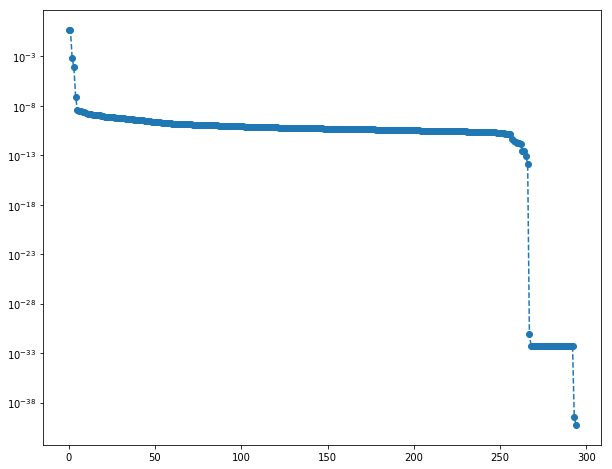

In [136]:
from sklearn.decomposition import PCA
pca = PCA().fit_transform(data.iloc[:,0:295])
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.semilogy(explained_variance_ratio, '--o')
#from looking at explained_variance_ration we can see first and second component together explains 
#As Variance ratio list is already sorted so no need to sort in descending order
top_variances = explained_variance_ratio[0] + explained_variance_ratio[1] 
print("Variance explained by PCA on original data is %.2f" % (top_variances*100)+"%")

## Perform PCA with Standardizing features

/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


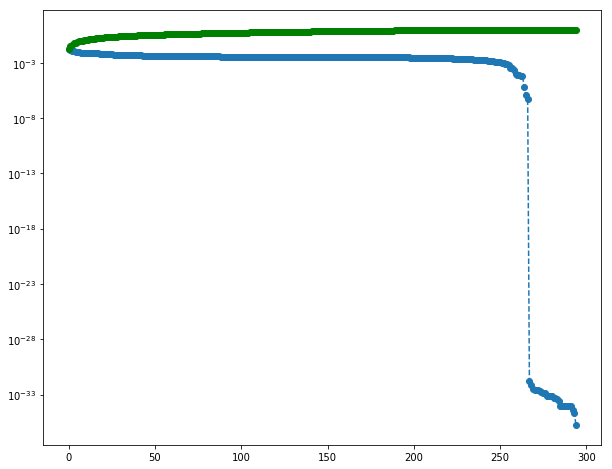

In [137]:
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data.iloc[:,0:295])
pca = PCA().fit_transform(z_data)
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.semilogy(explained_variance_ratio, '--o');
plt.semilogy(np.cumsum(explained_variance_ratio), '--go');

In [138]:
top_variances = explained_variance_ratio[0] + explained_variance_ratio[1] + explained_variance_ratio[2] + explained_variance_ratio[3] + explained_variance_ratio[4]
print("Variance explained by PCA after standardizing the data is %.2f" % (top_variances*100)+"%")

Variance explained by PCA after standardizing the data is 6.71%


In [139]:
#So we do not need to standardize the data and we can use 2 components as features for our modeling

In [67]:
def pca_general(x,y,label_name):
    x = StandardScaler().fit_transform(x.values)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = ["A","B","C","D","E"]
    colors = ['r', 'g', 'b','yellow','orange']
    print(finalDf.head())
    for target, color in zip(targets,colors):
        print(target)
        indicesToKeep = finalDf[label_name] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    return pd.DataFrame(principalComponents)

def pca_3_components(x,y):
    x = StandardScaler().fit_transform(x.values)
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['pc1', 'pc2', 'pc3'])
    three_d_dataset = principalDf.iloc[:,0:3]
    three_d_dataset["y"] = y
    three_d_dataset.head()
    targets = ["A","B","C","D","E"]
    threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
    colors = ['r', 'g', 'b','yellow','orange']
    for target, color in zip(targets,colors):
        indicesToKeep = three_d_dataset['y'] == target
        threedee.scatter(principalDf.loc[indicesToKeep, 'pc1'],three_d_dataset.loc[indicesToKeep, 'pc2',],
                     three_d_dataset.loc[indicesToKeep, 'pc3',], color=color)
    threedee.set_xlabel('pc1')
    threedee.set_ylabel('pc2')
    threedee.set_zlabel('pc3')
    plt.show()
    return (pd.DataFrame(three_d_dataset))

class PCA_Class:
    def __init__(self, data):
        self.x = data.iloc[:, 1:295]
        self.y = data.iloc[:, -1]
    
    def perform_pca(self):
        return pca_general(self.x, self.y, "B")
    
    def perform_pca_3_components(self):
        return pca_3_components(self.x, self.y)

In [68]:
class PreProcess:
    def __init__(self, data):
        self.orig_data = data
        self.label = data.iloc[:,-1]
        self.feature = data.iloc[:,1:295]

   principal component 1  principal component 2  B
0               2.069548              -0.799649  E
1               1.061831              -0.821294  D
2              -0.917042              -1.436149  C
3               1.479119               0.607490  D
4              -2.533724              -0.385200  C
A
B
C
D
E


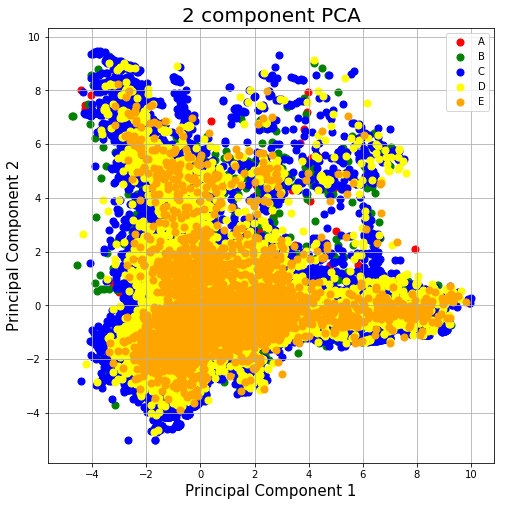

In [69]:
pca_object = PCA_Class(data)
pca_features = pca_object.perform_pca()

/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


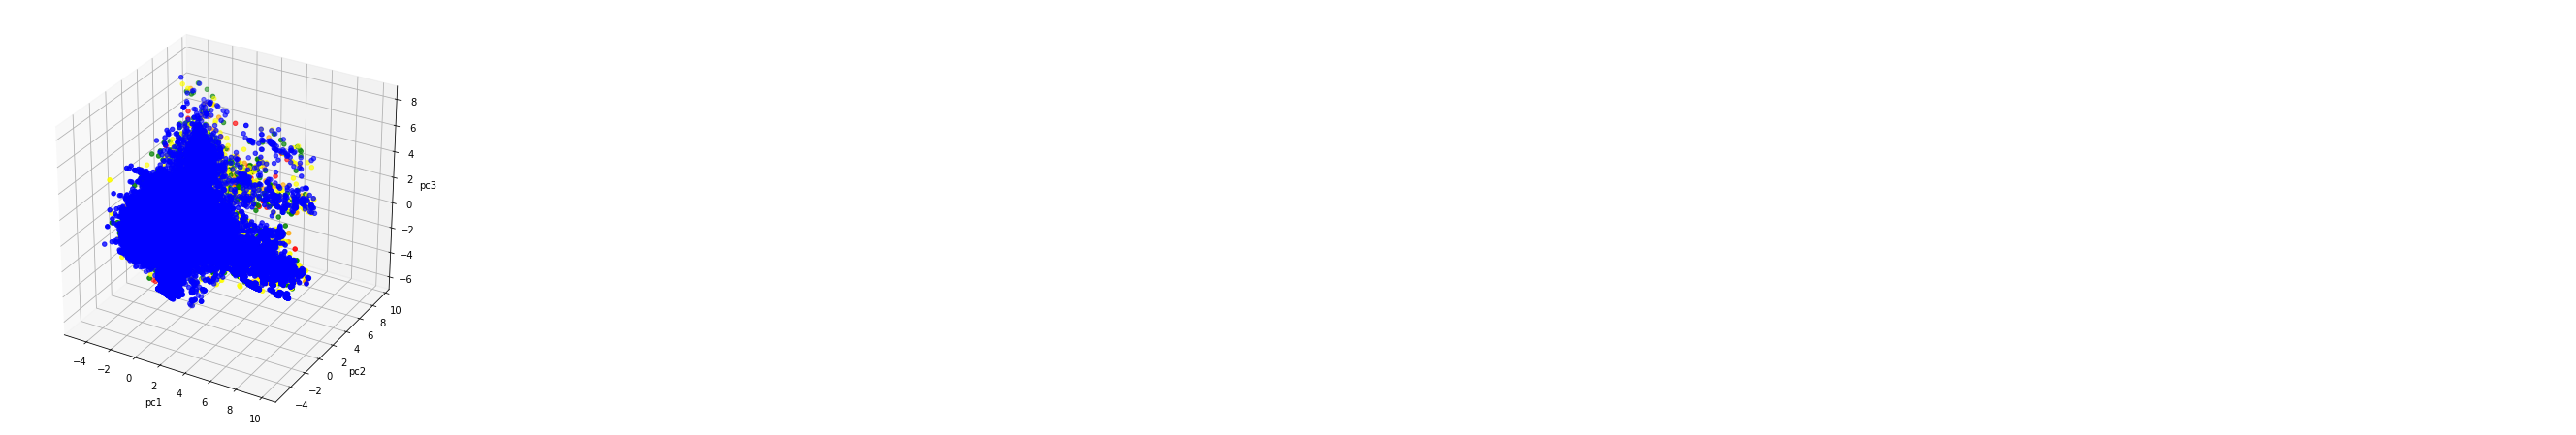

In [70]:
pca_features_3_comp = pca_object.perform_pca_3_components()
process_obj = PreProcess(data)

## Utiilify Class - Used Mainly to convert labels to one hot encoding

In [8]:
class Utitilities:
    def split_data(self,x,y):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
        return (X_train, X_test, y_train, y_test)
    
    def convert_labels_to_one_not_encode(self, labels):
        trainLabels = []
        for i in range(0, len(labels)):
            lab = labels[i]
            if lab == "A":
                trainLabels.append(np.array([1,0,0,0,0]))
            elif lab == "B":
                trainLabels.append(np.array([0,1,0,0,0]))
            elif lab == "C":
                trainLabels.append(np.array([0,0,1,0,0]))
            elif lab == "D":
                trainLabels.append(np.array([0,0,0,1,0]))
            else:
                trainLabels.append(np.array([0,0,0,0,1]))
        trainLabels = np.array(trainLabels)
        return trainLabels
    
    def convert_one_hot_to_multi_class(self, labels):
        trainLabels = []
        for i in range(0, len(labels)):
            lab = labels[i]
            if (lab == [1,0,0,0,0]).all():
                trainLabels.append("A")
            elif (lab == [0,1,0,0,0]).all():
                trainLabels.append("B")
            elif (lab == [0,0,1,0,0]).all():
                trainLabels.append("C")
            elif (lab == [0,0,0,1,0]).all():
                trainLabels.append("D")
            else:
                trainLabels.append("E")
        trainLabels = np.array(trainLabels)
        return trainLabels

# Model Class - Machine Learning Models
### Neural Network, Random Forest, Decision Tree, SVM and Keras Deep Neural Network 
### Grid Search to find best hyperparameters

In [71]:
class Model:
    def __init__(self):
        print("Model Object Created")
        
    def logistic_regression(self, X_train, X_test, y_train, y_test, x, y):
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(multi_class="multinomial",solver="saga")
        logreg.fit(X_train, y_train)
        print('Accuracy of Logistic regression classifier on training set: {:.2f}'
                 .format(logreg.score(X_train, y_train)))
        print('Accuracy of Logistic regression classifier on test set: {:.2f}'
                 .format(logreg.score(X_test, y_test)))
        logreg = LogisticRegression(multi_class="multinomial",solver="saga")
        
    def neural_net(self, X_train, y_train, X_test, y_test, x, y):
        clf = MLPClassifier(solver='sgd', alpha=0.001,hidden_layer_sizes=(16,16,5), random_state=1)   
        clf.fit(X_train, y_train)
        predicted_values = clf.predict(X_test)
        actual_values = y_test
        print("Accuracy of Neural Network classifier on train set: {}".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Accuracy of Neural Network classifier on test set: {}".format(accuracy_score(actual_values, predicted_values)))
        
    def decision_tree(self, X_train, y_train, X_test, y_test, x, y):
        '''
        for decision tree the cross validaion is done to get the error estimate but the tree will be trainined
        on the entire dataset like below
        '''
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'
             .format(clf.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'
             .format(clf.score(X_test, y_test)))
        
    def random_forest_classifier(self,X_train,y_train, X_test, y_test,x, y):
        from sklearn.ensemble import RandomForestClassifier
        #n_estimators mean n different trees
        random_forest = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
        print('Accuracy of Random classifier on training set: {:.2f}'
             .format(random_forest.score(X_train, y_train)))
        print('Accuracy of Random  classifier on test set: {:.2f}'
             .format(random_forest.score(X_test, y_test)))
    
    def svm(self, X_train, y_train, X_test, y_test):
        from sklearn.svm import SVC
        svm = SVC(gamma='auto')
        svm.fit(X_train, y_train)
        print('Accuracy of SVM classifier on training set: {:.2f}'
             .format(svm.score(X_train, y_train)))
        print('Accuracy of SVM classifier on test set: {:.2f}'
             .format(svm.score(X_test, y_test)))
        
    def nearest_neighbours(self, X_train,y_train, X_test, y_test):
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        print('Accuracy of K-NN classifier on training set: {:.2f}'
             .format(knn.score(X_train, y_train)))
        print('Accuracy of K-NN classifier on test set: {:.2f}'
             .format(knn.score(X_test, y_test)))
    
    def discriminant_analysis(self, X_train,y_train, X_test, y_test):
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train, y_train)
        print('Accuracy of LDA classifier on training set: {:.2f}'
             .format(lda.score(X_train, y_train)))
        print('Accuracy of LDA classifier on test set: {:.2f}'
             .format(lda.score(X_test, y_test)))

    def guasian_naive_bayes(self, X_train,y_train, X_test, y_test):
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        print('Accuracy of GNB classifier on training set: {:.2f}'
             .format(gnb.score(X_train, y_train)))
        print('Accuracy of GNB classifier on test set: {:.2f}'
             .format(gnb.score(X_test, y_test)))
        
    def deep_neural_network_keras_classification(self,x_train,y_train,x_test,y_test):
        learning_rate = 0.01
        weight_decay = 1e-6
        momentum = 0.6
        epochs = 25
        batch_size = 128
        input_dim = x_train.shape[1]
        output_dim = y_train.shape[1]
        model = Sequential()
        model.add(Dense(9, activation='tanh', input_dim=input_dim))
        model.add(Dense(9, activation='tanh'))
        model.add(Dense(9, activation='tanh'))
        model.add(Dense(output_dim, activation='softplus'))

        sgd = SGD(lr=learning_rate, momentum=momentum)
        adam = Adam(lr=learning_rate)
        ada_delta = Adadelta(lr=learning_rate)
        model.compile(loss='categorical_crossentropy',
                      optimizer=ada_delta,
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train,
                  epochs=epochs,
                  batch_size=batch_size)
        score = model.evaluate(x_test, y_test, batch_size=batch_size)
        # summarize history for accuracy
        plt.plot(history.history['acc'])
        #plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'], color="brown")
        #plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
    def grid_search(self, model, param_grid, X_train,y_train,X_test,y_test):
        print("Grid Search have started")
        start_time = time.time()
        tree = GridSearchCV(model, param_grid)
        tree.fit(X_train, y_train)
        print("Results of After All the Models Grid Search Performed")
        print("^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^")
        print(tree.cv_results_)
        print("Best Score After Grid Search Performed: {}".format(tree.best_score_))
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'
             .format(tree.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on test set: {:.2f}'
             .format(tree.score(X_test, y_test)))
        print("Parameters of the Best Model are {}".format(tree.best_params_))
        end_time = time.time()
        print("Total Time Taken: {}".format(end_time-start_time))
        print("^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^")

In [72]:
model_obj = Model()

Model Object Created


## Feature Reduction Using Random Forest Classifier
As we have 295 features, before modeling it is better we should check all of the features whether they all are important or not, if features are not important then we can remove them and finally select few features which are important

In [10]:
def select_features(features, labels):
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(features, labels)
    return(features.columns[(sel.get_support())])

In [11]:
def feature_selection(features, labels, no_of_times_reduce_features, label_name):
    new_data = features
    labels = labels
    start_time = time.time()
    for i in range(0,no_of_times_reduce_features):
        new_data_features = new_data
        selected_features = select_features(new_data_features, labels)
        print("++++++++++++++++++++++++++++++")
        print("Selected Features for the iteration number: {}".format(i))
        print(selected_features)
        print("++++++++++++++++++++++++++++++")
        new_data = new_data[selected_features]
        new_data_features = new_data
        labels = labels
        X_train,X_test,y_train,y_test = train_test_split(new_data_features, labels,test_size=0.2)
        print("iteration Number: {}".format(i))
        print("------------------------------")
        clf = DecisionTreeClassifier().fit(X_train, y_train)
        random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
        print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_test, y_test)))
        print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(random_forest.score(X_train, y_train)))
        print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(random_forest.score(X_test, y_test)))
        print("------------------------------")
        pcomp = pca_general(new_data_features, labels, label_name)
    end_time = time.time()
    print("Time Taken: {}".format(end_time - start_time))
    return selected_features
    

++++++++++++++++++++++++++++++
Selected Features for the iteration number: 0
Index(['20000', '0.3', '0.4', '1', '0.5', '0.11', '1.1', '0.17', '0.19', '1.2',
       '0.24', '0.28', '0.29', '1.3', '0.32', '0.33', '0.35', '0.36', '13.6',
       '0.37', '0.38', '0.41', '0.47', '0.49', '0.54', '232', '0.58', '1.4',
       '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.66', '0.73',
       '0.79', '0.80', '1.5', '0.81', '0.117', '0.159', '0.160', '0.161',
       '1.6', '0.162', '0.163', '0.164', '0.165', '0.166', '0.167', '0.186',
       '1.9', '0.276', '1.10', '0.277', '0.278', '259.227165'],
      dtype='object')
++++++++++++++++++++++++++++++
iteration Number: 0
------------------------------
Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on training set: 0.62
Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on training set: 0.70
------------------------------
   principal component 

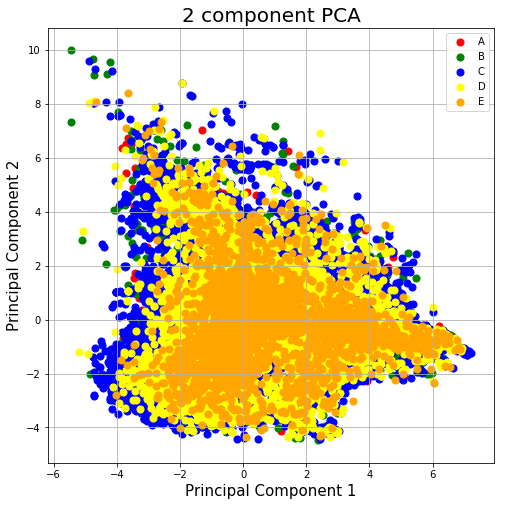

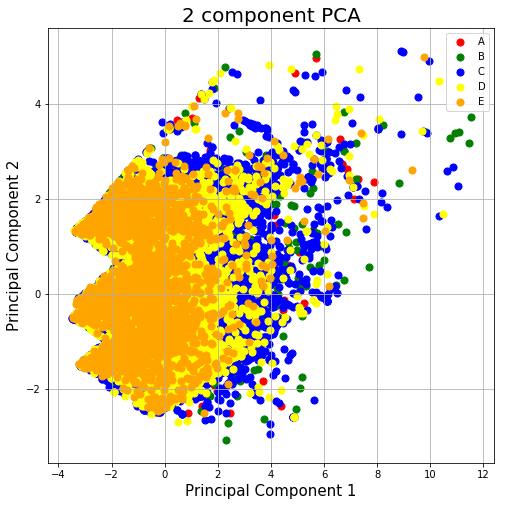

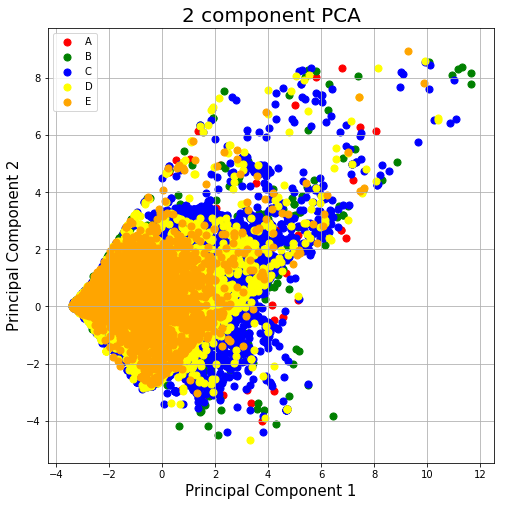

In [12]:
features = data.iloc[:,0:295]
labels = data.iloc[:,-1]
final_features = feature_selection(features, labels, 3, "B")

In [13]:
def resample_data(x,y):
    from imblearn.under_sampling import RandomUnderSampler
    ros = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(x, y)
    print("X sampled Shape: {}".format(x.shape))
    print("Y Sampled Shape: {}".format(y.shape))
    sampled_data = pd.DataFrame(X_resampled)
    sampled_data["labels"] = y_resampled
    return (sampled_data)

In [14]:
data_resampled = resample_data(data.iloc[:,0:295], data.iloc[:,-1])

X sampled Shape: (66136, 295)
Y Sampled Shape: (66136,)


In [15]:
#There are no changes after this process as the same features remain
'''
feature_selection(data_resampled.iloc[:,0:295], data_resampled.iloc[:,-1], 4, "labels")
'''

'\nfeature_selection(data_resampled.iloc[:,0:295], data_resampled.iloc[:,-1], 4, "labels")\n'

In [17]:
utility_obj = Utitilities()
neural_net_labels = utility_obj.convert_labels_to_one_not_encode(data.iloc[:,-1])
neural_net_features = data[final_features]
X_train,X_test,y_train,y_test = train_test_split(neural_net_features, neural_net_labels,test_size=0.2)
model_obj = Model()

Model Object Created


In [18]:
model_obj.neural_net(X_train, y_train, X_test, y_test, neural_net_features, neural_net_labels)

Accuracy of Neural Network classifier on train set: 0.7080970741664777
Accuracy of Neural Network classifier on test set: 0.7119745993347445


In [19]:
utility_obj = Utitilities()
neural_net_features = data[final_features]
neural_net_dataset = neural_net_features
neural_net_labels = pd.DataFrame(neural_net_labels)
neural_net_dataset["label0"] = neural_net_labels[0]
neural_net_dataset["label1"] = neural_net_labels[1]
neural_net_dataset["label2"] = neural_net_labels[2]
neural_net_dataset["label3"] = neural_net_labels[3]
neural_net_dataset["label4"] = neural_net_labels[4]
from sklearn.utils import shuffle
final_dataset_neural_net = shuffle(neural_net_dataset)
final_dataset_neural_net = final_dataset_neural_net.dropna()
final_neural_net_features = final_dataset_neural_net[final_features]
final_neural_net_labels = final_dataset_neural_net[["label0","label1","label2","label3","label4"]]
final_multiclass_labels = utility_obj.convert_one_hot_to_multi_class(final_neural_net_labels.values)
final_dataset_neural_net["multiclass"] = final_multiclass_labels

/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

# Model Accuracies with Entire Dataset - all features

In [92]:
original_dataset_features = data.iloc[:,0:295]
original_dataset_labels = data.iloc[:,-1]
original_dataset_labels_neural_net = utility_obj.convert_labels_to_one_not_encode(original_dataset_labels)
X_train,X_test,y_train,y_test = train_test_split(original_dataset_features, original_dataset_labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(original_dataset_features, original_dataset_labels_neural_net,test_size=0.2)

Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.71
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.68


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.71
Accuracy of GNB classifier on training set: 0.38
Accuracy of GNB classifier on test set: 0.38
Accuracy of Neural Network classifier on train set: 0.7074355484992818
Accuracy of Neural Network classifier on test set: 0.7146205019655276
Epoch 1/25
52908/52908 [==============================] - 2s 39us/step - loss: 1.4005 - acc: 0.6833
Epoch 2/25
52908/52908 [==============================] - 1s 25us/step - loss: 1.3471 - acc: 0.6857
Epoch 3/25
52908/52908 [==============================] - 1s 24us/step - loss: 1.2917 - acc: 0.6876
Epoch 4/25
52908/52908 [==============================] - 1s 24us/step - loss: 1.2379 - acc: 0.6986
Epoch 5/25
52908/52908 [==============================] - 1s 24us/step - loss: 1.1883 - acc: 0.7051
Epoch 6/25
52908/52908 [==============================] - 1s 25us/step - loss: 1.1444 - acc: 0.7053
Epoch 7/25
52908/52908 [==============================] - 1s 24us/step 

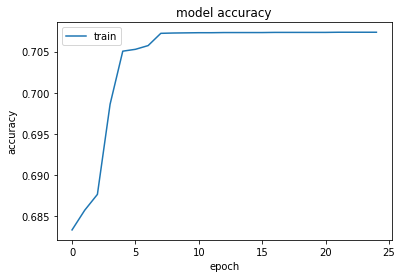

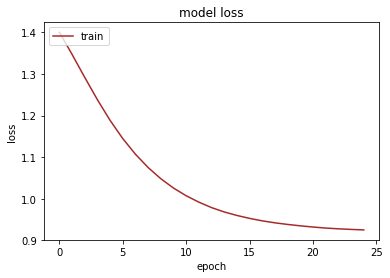

In [93]:
model_obj.decision_tree(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, final_neural_net_features, final_neural_net_labels)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Model Accuracies with Entire Dataset - After Data Rescaling - Standardization, Normalization

In [115]:
from sklearn.utils import shuffle
data_modified = shuffle(data)
original_dataset_features = data_modified.iloc[:,0:295]
original_dataset_labels = data_modified.iloc[:,-1]
original_dataset_labels_neural_net = utility_obj.convert_labels_to_one_not_encode(original_dataset_labels)
original_dataset_features_normalized = preprocessing.normalize(original_dataset_features, norm='l2')
X_train,X_test,y_train,y_test = train_test_split(original_dataset_features_normalized, original_dataset_labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(original_dataset_features_normalized, original_dataset_labels_neural_net,test_size=0.2)

Accuracy of Decision Tree classifier on training set: 0.72
Accuracy of Decision Tree classifier on test set: 0.70
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.71
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.67


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.69
Accuracy of GNB classifier on training set: 0.63
Accuracy of GNB classifier on test set: 0.62
Accuracy of Neural Network classifier on train set: 0.7080781734331292
Accuracy of Neural Network classifier on test set: 0.7120501965527669
Epoch 1/25
52908/52908 [==============================] - 2s 40us/step - loss: 1.5636 - acc: 0.5809
Epoch 2/25
52908/52908 [==============================] - 1s 27us/step - loss: 1.5108 - acc: 0.7073
Epoch 3/25
52908/52908 [==============================] - 1s 23us/step - loss: 1.4245 - acc: 0.7081
Epoch 4/25
52908/52908 [==============================] - 1s 25us/step - loss: 1.2750 - acc: 0.7081
Epoch 5/25
52908/52908 [==============================] - 1s 26us/step - loss: 1.0892 - acc: 0.7081
Epoch 6/25
52908/52908 [==============================] - 1s 26us/step - loss: 0.9860 - acc: 0.7081
Epoch 7/25
52908/52908 [==============================] - 1s 24us/step 

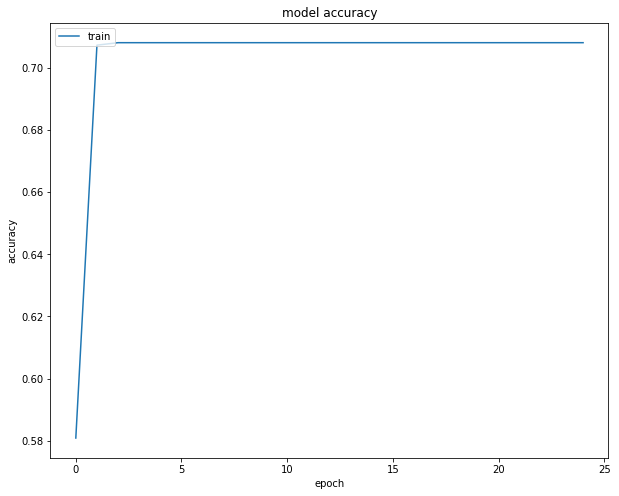

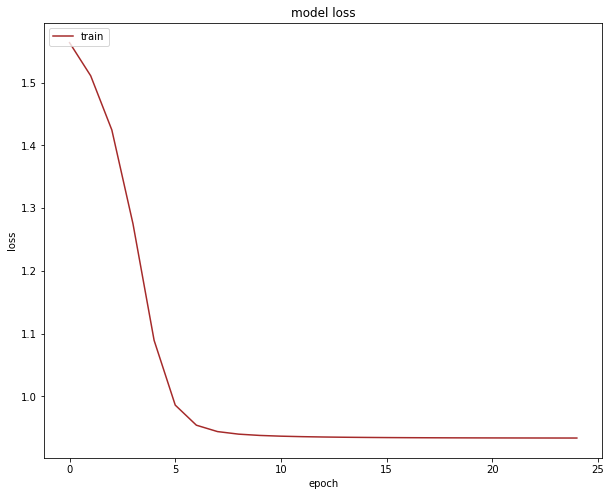

In [116]:
model_obj.decision_tree(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, final_neural_net_features, final_neural_net_labels)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Model Accuracies with only selected features

Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.70
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.68
Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71
Accuracy of GNB classifier on training set: 0.68
Accuracy of GNB classifier on test set: 0.69
Accuracy of Neural Network classifier on train set: 0.7094390262342178
Accuracy of Neural Network classifier on test set: 0.7066071968551557
Epoch 1/25
52908/52908 [==============================] - 2s 34us/step - loss: 1.4147 - acc: 0.4199
Epoch 2/25
52908/52908 [==============================] - 1s 17us/step - loss: 1.3511 - acc: 0.6958
Epoch 3/25
52908/52908 [==============================] - 1s 16us/step - loss: 1.2810 - acc: 0.7020
Epoch 4/25
52908/52908 [==============================] - 1s

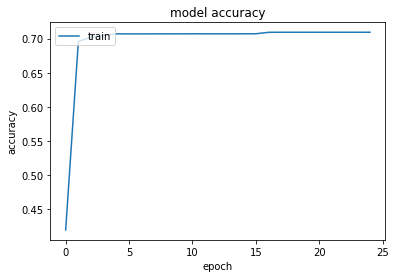

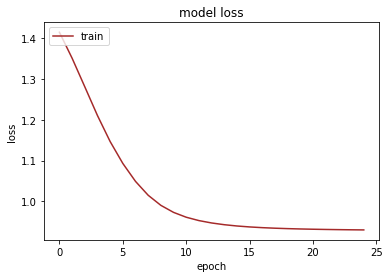

In [94]:
X_train,X_test,y_train,y_test = train_test_split(final_neural_net_features, final_multiclass_labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(final_neural_net_features, final_neural_net_labels,test_size=0.2)
model_obj.decision_tree(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, final_neural_net_features, final_multiclass_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, final_neural_net_features, final_neural_net_labels)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Model Accuracies with only selected features After Rescaling Data - Normalization


Accuracy of Decision Tree classifier on training set: 0.72
Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.69
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.67
Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71
Accuracy of GNB classifier on training set: 0.68
Accuracy of GNB classifier on test set: 0.68
Accuracy of Neural Network classifier on train set: 0.7052997656309065
Accuracy of Neural Network classifier on test set: 0.7010885999395222
Epoch 1/25
52908/52908 [==============================] - 2s 40us/step - loss: 1.5147 - acc: 0.5976
Epoch 2/25
52908/52908 [==============================] - 1s 20us/step - loss: 1.4463 - acc: 0.7096
Epoch 3/25
52908/52908 [==============================] - 1s 21us/step - loss: 1.3684 - acc: 0.7096
Epoch 4/25
52908/52908 [==============================] - 1s

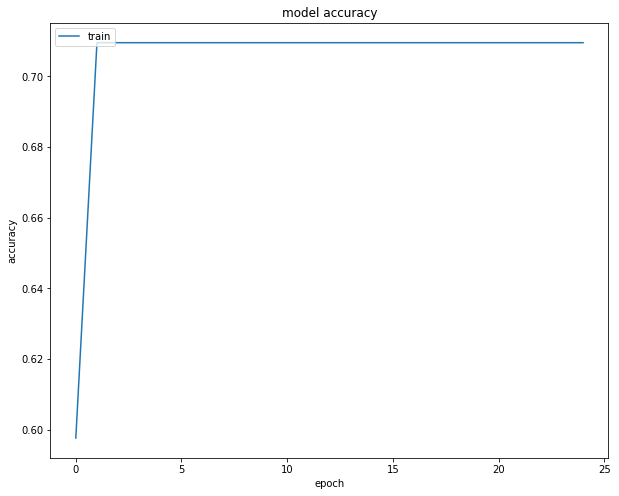

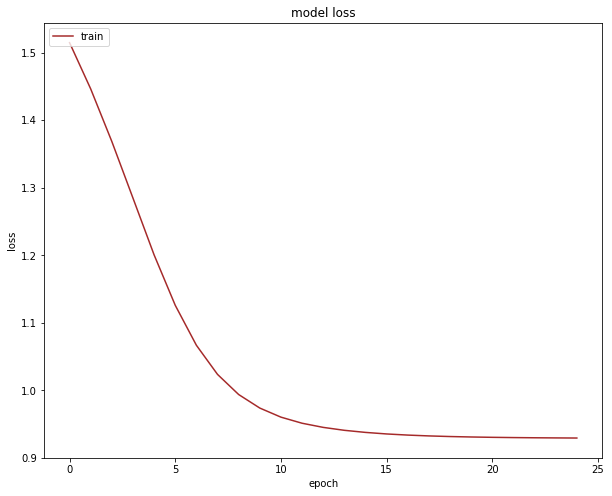

In [117]:
final_neural_net_features_normalized = preprocessing.normalize(final_neural_net_features, norm='l2')
X_train,X_test,y_train,y_test = train_test_split(final_neural_net_features_normalized, final_multiclass_labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(final_neural_net_features_normalized, final_neural_net_labels,test_size=0.2)
model_obj.decision_tree(X_train, y_train, X_test, y_test, final_neural_net_features_normalized, final_multiclass_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, final_neural_net_features_normalized, final_multiclass_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, final_neural_net_features_normalized, final_neural_net_labels)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Model Accuracies with PCA Components

In [95]:
utility_obj = Utitilities()
pca_features = pca_features_3_comp[["pc1","pc2","pc3"]]
pca_labels = pca_features_3_comp["y"]
pca_labels_one_hot_encode = utility_obj.convert_labels_to_one_not_encode(data.iloc[:,-1])

Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.69
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.67
Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71
Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.70
Accuracy of Neural Network classifier on train set: 0.6856997051485597
Accuracy of Neural Network classifier on test set: 0.6856667674629574
Epoch 1/25
52908/52908 [==============================] - 2s 38us/step - loss: 1.6199 - acc: 0.3020
Epoch 2/25
52908/52908 [==============================] - 1s 18us/step - loss: 1.5782 - acc: 0.3454
Epoch 3/25
52908/52908 [==============================] - 1s 18us/step - loss: 1.5334 - acc: 0.4078
Epoch 4/25
52908/52908 [==============================] - 1s

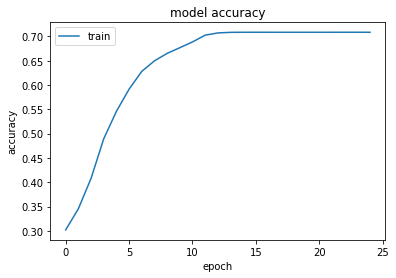

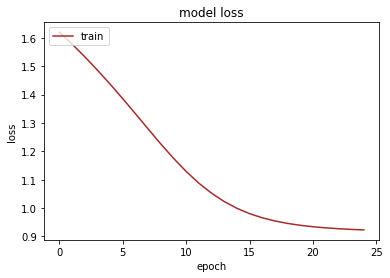

In [96]:
X_train,X_test,y_train,y_test = train_test_split(pca_features, pca_labels,test_size=0.3)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(pca_features, pca_labels_one_hot_encode,test_size=0.2)
model_obj.decision_tree(X_train, y_train, X_test, y_test, pca_features, pca_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, pca_features, pca_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, pca_features, pca_labels_one_hot_encode)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Model Accuracies with PCA Components After Normalization

Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.70
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.66
Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.66
Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.71
Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.71


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of Neural Network classifier on train set: 0.6895743554849928
Accuracy of Neural Network classifier on test set: 0.6945116419715754
Epoch 1/25
52908/52908 [==============================] - 2s 39us/step - loss: 1.5914 - acc: 0.3168
Epoch 2/25
52908/52908 [==============================] - 1s 19us/step - loss: 1.5585 - acc: 0.4227
Epoch 3/25
52908/52908 [==============================] - 1s 19us/step - loss: 1.5158 - acc: 0.5267
Epoch 4/25
52908/52908 [==============================] - 1s 19us/step - loss: 1.4602 - acc: 0.5807
Epoch 5/25
52908/52908 [==============================] - 1s 22us/step - loss: 1.3882 - acc: 0.6150
Epoch 6/25
52908/52908 [==============================] - 1s 23us/step - loss: 1.2988 - acc: 0.6732
Epoch 7/25
52908/52908 [==============================] - 1s 21us/step - loss: 1.1997 - acc: 0.7077
Epoch 8/25
52908/52908 [==============================] - 1s 21us/step - loss: 1.1075 - acc: 0.7083
Epoch 9/25
52908/52908 [==============================] - 1

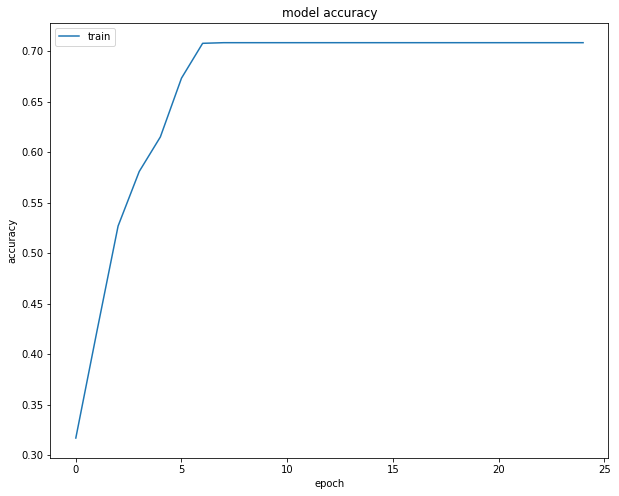

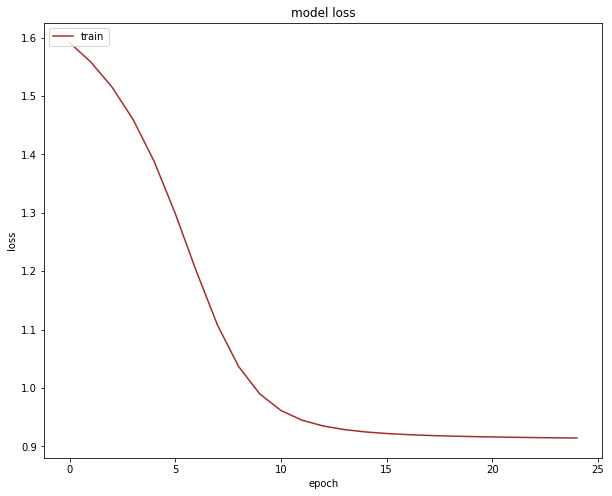

In [118]:
pca_features_normalized = preprocessing.normalize(pca_features, norm='l2')
X_train,X_test,y_train,y_test = train_test_split(pca_features_normalized, pca_labels,test_size=0.3)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(pca_features_normalized, pca_labels_one_hot_encode,test_size=0.2)
model_obj.decision_tree(X_train, y_train, X_test, y_test, pca_features_normalized, pca_labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, pca_features_normalized, pca_labels)
model_obj.nearest_neighbours(X_train, y_train, X_test, y_test)
model_obj.discriminant_analysis(X_train, y_train, X_test, y_test)
model_obj.guasian_naive_bayes(X_train, y_train, X_test, y_test)
model_obj.neural_net(X_train_n, y_train_n, X_test_n, y_test_n, pca_features_normalized, pca_labels_one_hot_encode)
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

# Hyperparameter Optimization for Deep Neural Network

Epoch 1/25
52908/52908 [==============================] - 2s 44us/step - loss: 0.9725 - acc: 0.7017
Epoch 2/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9104 - acc: 0.7092
Epoch 3/25
52908/52908 [==============================] - 2s 30us/step - loss: 0.9074 - acc: 0.7094
Epoch 4/25
52908/52908 [==============================] - 2s 30us/step - loss: 0.9057 - acc: 0.7095
Epoch 5/25
52908/52908 [==============================] - 2s 30us/step - loss: 0.9045 - acc: 0.7095
Epoch 6/25
52908/52908 [==============================] - 2s 30us/step - loss: 0.9037 - acc: 0.7095
Epoch 7/25
52908/52908 [==============================] - 2s 33us/step - loss: 0.9031 - acc: 0.7095
Epoch 8/25
52908/52908 [==============================] - 2s 32us/step - loss: 0.9027 - acc: 0.7095
Epoch 9/25
52908/52908 [==============================] - 2s 39us/step - loss: 0.9023 - acc: 0.7095
Epoch 10/25
52908/52908 [==============================] - 2s 37us/step - loss: 0.9020 - acc: 0.7095

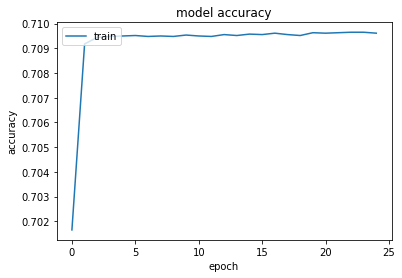

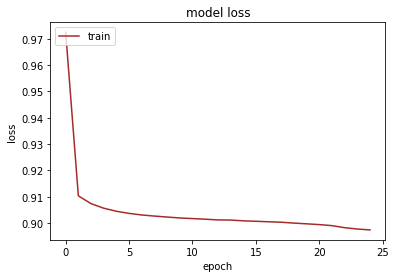

In [31]:
#Train Model with Adadelta optimizer
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

Epoch 1/25
52908/52908 [==============================] - 2s 33us/step - loss: 1.3807 - acc: 0.7072
Epoch 2/25
52908/52908 [==============================] - 1s 18us/step - loss: 1.3168 - acc: 0.7092
Epoch 3/25
52908/52908 [==============================] - 1s 17us/step - loss: 1.2516 - acc: 0.7092
Epoch 4/25
52908/52908 [==============================] - 1s 17us/step - loss: 1.1896 - acc: 0.7093
Epoch 5/25
52908/52908 [==============================] - 1s 16us/step - loss: 1.1339 - acc: 0.7095
Epoch 6/25
52908/52908 [==============================] - 1s 16us/step - loss: 1.0868 - acc: 0.7095
Epoch 7/25
52908/52908 [==============================] - 1s 16us/step - loss: 1.0492 - acc: 0.7095
Epoch 8/25
52908/52908 [==============================] - 1s 16us/step - loss: 1.0202 - acc: 0.7095
Epoch 9/25
52908/52908 [==============================] - 1s 16us/step - loss: 0.9979 - acc: 0.7095
Epoch 10/25
52908/52908 [==============================] - 1s 16us/step - loss: 0.9807 - acc: 0.7095

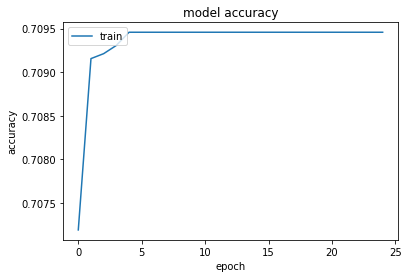

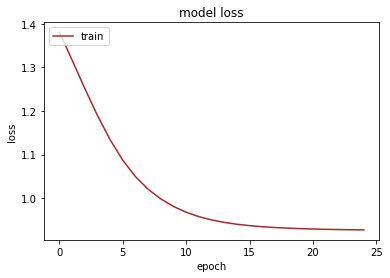

In [55]:
#With Momentum with SGD
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

Epoch 1/25
52908/52908 [==============================] - 2s 43us/step - loss: 1.0502 - acc: 0.6713
Epoch 2/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9194 - acc: 0.7095
Epoch 3/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9146 - acc: 0.7095
Epoch 4/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9125 - acc: 0.7095
Epoch 5/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9109 - acc: 0.7095
Epoch 6/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9099 - acc: 0.7095
Epoch 7/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9090 - acc: 0.7095
Epoch 8/25
52908/52908 [==============================] - 2s 31us/step - loss: 0.9084 - acc: 0.7095
Epoch 9/25
52908/52908 [==============================] - 2s 32us/step - loss: 0.9078 - acc: 0.7095
Epoch 10/25
52908/52908 [==============================] - 2s 32us/step - loss: 0.9072 - acc: 0.7095

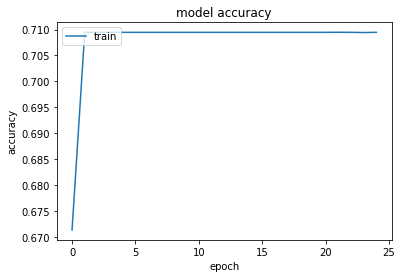

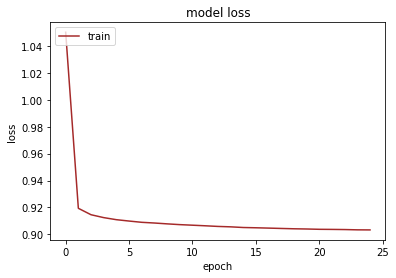

In [45]:
#With Momentum with SGD with softplus as the activation functin
model_obj.deep_neural_network_keras_classification(X_train_n, y_train_n, X_test_n, y_test_n)

In [184]:
'''
Takes Time Accuracy is Same
model_obj.svm(X_train, y_train, X_test, y_test)
'''


'\nTakes Time Accuracy is Same\nmodel_obj.svm(X_train, y_train, X_test, y_test)\n'

In [91]:
dataset_57_features = data[final_features]
labels = data.iloc[:,-1]
utilitity_obj = Utitilities()
labels_neural_net = utilitity_obj.convert_labels_to_one_not_encode(labels)
X_train,X_test,y_train,y_test = train_test_split(dataset_57_features, labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(dataset_57_features, labels_neural_net,test_size=0.2)
model_obj = Model()

Model Object Created


In [89]:
model_obj.decision_tree(X_train, y_train, X_test, y_test, dataset_57_features, labels)
model_obj.random_forest_classifier(X_train, y_train, X_test, y_test, dataset_57_features, labels)

Model Object Created
Accuracy of Decision Tree classifier on training set: 0.72
Accuracy of Decision Tree classifier on test set: 0.70
Accuracy of Random classifier on training set: 0.99
Accuracy of Random  classifier on test set: 0.69


# Grid Search Technique
### Decision Tree

In [92]:
param_grid = {'max_depth': np.arange(2, 15)}
model_obj.grid_search(DecisionTreeClassifier(), param_grid, X_train, y_train, X_test, y_test)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([0.06204462, 0.07346694, 0.0951709 , 0.11847727, 0.10595059,
       0.10789196, 0.11788694, 0.12591775, 0.13438694, 0.14438613,
       0.15179102, 0.15975928, 0.16834895]), 'std_fit_time': array([4.24308985e-03, 3.39815025e-03, 1.04221248e-02, 4.09982351e-02,
       5.27532468e-03, 3.58054560e-04, 2.08264239e-03, 2.47805985e-04,
       8.60435560e-04, 5.50920160e-04, 9.78979189e-05, 6.05099152e-04,
       6.46860738e-04]), 'mean_score_time': array([0.01746146, 0.0183781 , 0.02335811, 0.02236096, 0.01856009,
       0.01785572, 0.01785334, 0.01818585, 0.01812045, 0.01853641,
       0.01864338, 0.01929371, 0.01990342]), 'std_score_time': array([1.87378836e-04, 1.04047435e-03, 5.08769142e-03, 6.59922912e-03,
       6.81730244e-04, 5.94299724e-05, 1.18434348e-04, 8.47686744e-05,
       5.32132370e-05, 2.18595153e-05, 1.17669170e-04, 4.6567575

### Neural Network with SGD Solver

In [93]:
#SGD Solver - Takes Average Time
param_grid_neural_net = {"solver":["sgd"], 
              "alpha": [0.001],
              "hidden_layer_sizes": [(3,5),(3,3,5),(3,3,3,5),(6,5),(6,6,5),(6,6,6,5),(9,5),(9,9,9,5)],
             "random_state": [1]}
model_obj.grid_search(MLPClassifier(), param_grid_neural_net, X_train_n, y_train_n, X_test_n, y_test_n)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([2.3144513 , 2.46375942, 3.54881152, 3.07521701, 2.80089672,
       5.49551598, 2.55397916, 5.55496613]), 'std_fit_time': array([0.10839041, 0.32461709, 0.45565089, 0.39421684, 0.73999263,
       0.01831281, 0.36208278, 0.33793553]), 'mean_score_time': array([0.00969974, 0.00972072, 0.00978756, 0.00922108, 0.01026058,
       0.0104657 , 0.00948588, 0.01198951]), 'std_score_time': array([1.03139889e-03, 4.77696373e-04, 1.59092676e-05, 1.48542747e-04,
       5.97051631e-04, 1.40638178e-04, 1.12496914e-04, 4.74967204e-05]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(3, 5), (3, 3, 5), (3, 3, 3, 5), (6, 5), (6, 6, 5),
      

### Neural Network with LBFGS Solver

In [96]:
#LBFGS Solver - Takes Very Less Time
param_grid_neural_net = {"solver":["lbfgs"], 
              "alpha": [0.001],
              "hidden_layer_sizes": [(3,5),(3,3,5),(3,3,3,5),(6,5),(6,6,5),(6,6,6,5),(9,5),(9,9,9,5)],
             "random_state": [1]}
model_obj.grid_search(MLPClassifier(), param_grid_neural_net, X_train_n, y_train_n, X_test_n, y_test_n)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([0.27556602, 0.32416995, 0.37345576, 0.34073146, 0.96278803,
       0.31168556, 2.60806624, 6.45678043]), 'std_fit_time': array([1.37548500e-02, 6.19068663e-03, 1.38731599e-03, 3.71833286e-03,
       5.55499259e-01, 3.76113070e-03, 6.72553832e-01, 2.91652241e+00]), 'mean_score_time': array([0.00952355, 0.009842  , 0.01036112, 0.01099078, 0.01094874,
       0.01195176, 0.01252007, 0.01800021]), 'std_score_time': array([3.28610655e-04, 8.15810486e-05, 1.65783319e-04, 2.96779794e-05,
       9.48802771e-05, 3.87781953e-05, 6.90531771e-04, 6.39144067e-03]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(3, 5), (3, 3, 5), (3, 3, 

### Neural Network with ADAM Solver

In [ ]:
#ADAM Solver - Takes Lot of Time
'''
param_grid_neural_net = {"solver":["adam"], 
              "alpha": [0.001],
              "hidden_layer_sizes": [(3,5),(3,3,5),(3,3,3,5),(6,5),(6,6,5),(6,6,6,5),(9,5),(9,9,9,5)],
             "random_state": [1]}
model_obj.grid_search(MLPClassifier(), param_grid_neural_net, X_train_n, y_train_n, X_test_n, y_test_n)
'''

## Grid Search For PCA Features

In [105]:
'''
Grid Search for PCA Generated Dataset
'''
pca_generated_features = pca_generated_features_2_comp[[0,1]]
labels = data.iloc[:,-1]
utilitity_obj = Utitilities()
labels_neural_net = utilitity_obj.convert_labels_to_one_not_encode(labels)
X_train,X_test,y_train,y_test = train_test_split(pca_generated_features, labels,test_size=0.2)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(pca_generated_features, labels_neural_net,test_size=0.2)
model_obj = Model()

Model Object Created


In [108]:
param_grid = {'max_depth': np.arange(2, 15)}
model_obj.grid_search(DecisionTreeClassifier(), param_grid, X_train, y_train, X_test, y_test)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([0.05859462, 0.06982064, 0.08695594, 0.0868969 , 0.094805  ,
       0.09601641, 0.10206532, 0.11059602, 0.11735741, 0.1244363 ,
       0.13043396, 0.13696003, 0.14214031]), 'std_fit_time': array([0.00428438, 0.00437922, 0.01466015, 0.00976661, 0.00670497,
       0.00109926, 0.00045865, 0.0003878 , 0.00045197, 0.00048376,
       0.0002722 , 0.00080752, 0.00139671]), 'mean_score_time': array([0.01844573, 0.01903073, 0.02472997, 0.01788839, 0.01907102,
       0.01809096, 0.01807205, 0.01821311, 0.01822503, 0.01849969,
       0.01862462, 0.01904122, 0.0193154 ]), 'std_score_time': array([0.00120522, 0.0011688 , 0.00871764, 0.00051007, 0.001012  ,
       0.00027901, 0.00025435, 0.0003681 , 0.00016222, 0.00016596,
       0.00018827, 0.00034183, 0.00048396]), 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
   

In [109]:
#SGD Solver - Takes Average Time
param_grid_neural_net = {"solver":["sgd"], 
              "alpha": [0.001],
              "hidden_layer_sizes": [(3,5),(3,3,5),(3,3,3,5),(6,5),(6,6,5),(6,6,6,5),(9,5),(9,9,9,5)],
             "random_state": [1]}
model_obj.grid_search(MLPClassifier(), param_grid_neural_net, X_train_n, y_train_n, X_test_n, y_test_n)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([ 8.23834054, 12.78447199, 13.56035733, 10.76176675,  9.13608726,
       13.44624376, 13.52189732,  9.6276869 ]), 'std_fit_time': array([0.64460152, 1.19416193, 1.16909545, 1.49915849, 0.50833517,
       0.26575881, 0.01860281, 1.79597626]), 'mean_score_time': array([0.011017  , 0.00940267, 0.01048668, 0.00948795, 0.01048644,
       0.01162958, 0.01034204, 0.01292237]), 'std_score_time': array([2.69961142e-03, 9.37314241e-05, 9.23603713e-04, 6.50331806e-05,
       4.98503292e-05, 1.20735099e-04, 1.26855016e-04, 5.07560709e-04]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(3, 5), (3, 3, 5), (3, 3, 3, 5), (6, 5), (6, 6, 5)

In [111]:
#LBFGS Solver - Takes Very Less Time
param_grid_neural_net = {"solver":["lbfgs"], 
              "alpha": [0.001],
              "hidden_layer_sizes": [(3,5),(3,3,5),(3,3,3,5),(6,5),(6,6,5),(6,6,6,5),(9,5),(9,9,9,5)],
             "random_state": [1]}
model_obj.grid_search(MLPClassifier(), param_grid_neural_net, X_train_n, y_train_n, X_test_n, y_test_n)

Grid Search have started


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Results of After All the Models Grid Search Performed
^*^*^*^*^^*^*^*^*^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^^*^*^*^*^*^
{'mean_fit_time': array([2.83508468, 3.97242332, 3.56457543, 3.09031423, 3.92118375,
       4.65224338, 3.60106357, 6.11372066]), 'std_fit_time': array([0.03669945, 0.62873906, 0.1428751 , 0.03285622, 0.0366149 ,
       0.04122134, 0.03780488, 0.15281122]), 'mean_score_time': array([0.01006667, 0.01368523, 0.01015051, 0.01028999, 0.01106588,
       0.01217326, 0.01073472, 0.01315363]), 'std_score_time': array([8.46821542e-04, 4.92064322e-03, 3.16305975e-05, 9.09756341e-05,
       1.03777254e-04, 2.72528624e-04, 3.17611511e-04, 3.59429027e-04]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(3, 5), (3, 3, 5), (3, 3, 3, 5), (6, 5), (6, 6, 5),
      